11. Autoencoder


In [ ]:
input_dim = X_scaled.shape[1]
encoding_dim = 16

inp = layers.Input(shape=(input_dim,))
enc = layers.Dense(64, activation="relu")(inp)
bottleneck = layers.Dense(encoding_dim, activation="relu")(enc)
dec = layers.Dense(64, activation="relu")(bottleneck)
out = layers.Dense(input_dim, activation="linear")(dec)

autoencoder = models.Model(inp, out)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

encoder_model = models.Model(inputs=inp, outputs=bottleneck)
X_auto = encoder_model.predict(X_scaled)

encoder_model.save("project/models/autoencoder_model.h5")
pd.DataFrame(X_auto).to_csv("project/models/autoencoder_features.csv", index=False)

print("Autoencoder reduced shape:", X_auto.shape)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 1.0406 - val_loss: 1.0080
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9617 - val_loss: 1.0029
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.0462 - val_loss: 1.0014
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.9007 - val_loss: 1.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.9500 - val_loss: 1.0013
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 1.0316 - val_loss: 1.0014
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.9823 - val_loss: 1.0021
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 1.0058 - val_loss: 1.0030
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.8570 - val_loss: 1.0033
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.8358 - val_loss: 1.0024
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.8364 - val_loss: 1.0001
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.8352 - 

Autoencoder reduced shape: (38, 16)


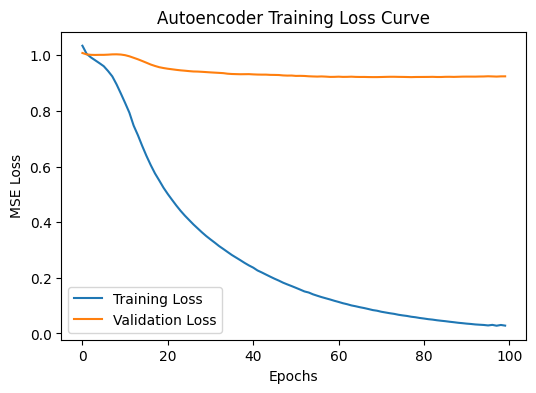

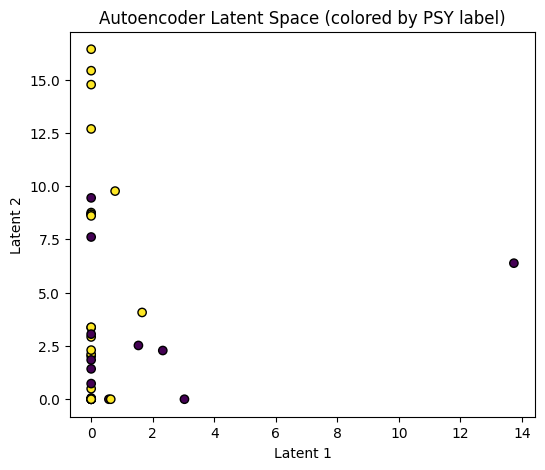

In [ ]:
# 1. Training loss curve
history = autoencoder.history.history
plt.figure(figsize=(6,4))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss Curve")
plt.legend()
plt.show()

# 2. 2D latent space (if at least 2 dims)
if X_auto.shape[1] >= 2:
    plt.figure(figsize=(6,5))
    if 'y' in locals() and y is not None:
        plt.scatter(X_auto[:,0], X_auto[:,1], c=y, cmap='viridis', edgecolors='k')
        plt.title("Autoencoder Latent Space (colored by PSY label)")
    else:
        plt.scatter(X_auto[:,0], X_auto[:,1], color="purple", edgecolors='k')
        plt.title("Autoencoder Latent Space (unsupervised)")
    plt.xlabel("Latent 1")
    plt.ylabel("Latent 2")
    plt.show()
